<a href="https://colab.research.google.com/github/RajatSaha1106/ML-from-Scratch/blob/main/P_346_AS_3_Rajat_Shuvra_Saha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# **This is our first problem in this lesson.**

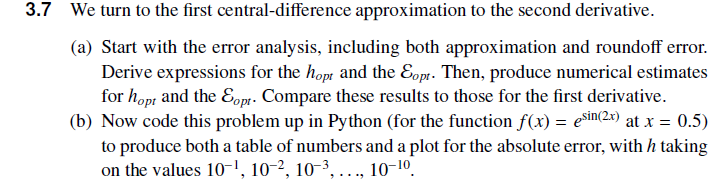

The First order central difference approximation is given by:
$$f'(x)=\frac{f(x+h)-f(x-h)}{2h}$$
where is a small step size.


To approximate the second derivative, you can use the central differences of the first derivative. The central difference formula for the second derivative at $x$ is:
$$ f''(x)=\frac{f(x+h)-2f(x)+f(x+h)}{h^2}+O(h^2)$$


**Approximation Errors**

To analyze the error, we perform a Taylor Series expansion for $f(x+h)$
and $f(x-h)$

* For $f(x+h)$ , we have:
$f(x+h)=f(x)+f'(x)h+\frac{f''(x)}{2}h^2+\frac{f'''(x)}{6}h^3+O(h^4)$
* For $(x-h)$, we have:
$f(x-h)=f(x) - f'(x)h + \frac{f''(x)}{2}h^2 - \frac{f'''(x)}{6}h^3 + O(h^4)$

Adding these two equations gives:
$$
f(x + h) + f(x - h) = 2f(x) + f''(x)h^2 + \frac{f^{(4)}(x)}{12}h^4 + O(h^5)
$$
Thus, the approximation error for the second derivative is with all the even terms.
$\text{Approximation Error} = -\frac{f^{(4)}(x)}{12}h^2$

We will take modulus of this, so this becomes:
$$\epsilon_{approx}=\frac{f^4(x)}{12}h^2$$


**Roundoff Errors**

Roundoff error is typically proportional to $ \frac{1}{h}$

More precisely, Roundoff Error can be bounded as:
$$\Delta f''(x)\leq |\Delta f(x)|+2|\Delta f(x)|+|\Delta f(x-h)| $$
$$\implies\ |\Delta f''(x)|\ \leq\ 3|\Delta f(x)|$$
In the above we have assumed, $f(x+h)≈f(x)$ for small $h$.

Let us assume $\epsilon_{m}$ as our machine precision. Then, we can remove our inequality and write:

$$|\Delta f''(x)|=3|\epsilon_{m}||f(x)|$$.

Now, if we assume there is a dependence on $\frac{1}{h}$ we get,
$$\epsilon_{roundout}=3\frac{|\epsilon_{m}||f(x)|}{h}$$
where, $h$ is a small step size.

Combining $\epsilon_{approx}$ and $\epsilon_{roundout}$ errors together we have:

$$\epsilon=\frac{f^4(x)}{12}h^2+3\frac{|\epsilon_{m}||f(x)|}{h}$$

To minimize the total error $ \epsilon $, find the optimal step size $ h_{\text{opt}} $. Differentiate $ \epsilon $ with respect to $ h $ and set the derivative to zero:
  

Solving for $ h $:

$$
\frac{|f^{(4)}(x)|}{6} h = 3 \frac{|\epsilon_m| |f(x)|}{h^2}
$$

$$
h^3 = \frac{18 |\epsilon_m| |f(x)|}{|f^{(4)}(x)|}
$$

$$
h_{\text{opt}} = \left( \frac{18 |\epsilon_m| |f(x)|}{|f^{(4)}(x)|} \right)^{1/3}
$$

### Optimal Error ($ \epsilon_{\text{opt}} $)
Substitute $ h_{\text{opt}} $ into the total error formula:

$$
\epsilon_{\text{opt}} = \frac{|f^{(4)}(x)|}{12} h_{\text{opt}}^2 + 3 \frac{|\epsilon_m| |f(x)|}{h_{\text{opt}}}
$$


$$
\epsilon = \frac{|f^{(4)}(x)|}{12} h^2 + 3 \frac{|\epsilon_m| |f(x)|}{h}
$$

Substituting the optimal step size $ h_{\text{opt}}$:

$$
h_{\text{opt}} = \left( \frac{18 |\epsilon_m| |f(x)|}{|f^{(4)}(x)|} \right)^{1/3}
$$

The optimal error $ \epsilon_{\text{opt}} $ is:

$$
\epsilon_{\text{opt}} = \frac{|f^{(4)}(x)|}{12} h_{\text{opt}}^2 + 3 \frac{|\epsilon_m| |f(x)|}{h_{\text{opt}}}
$$

Substitute $ h_{\text{opt}} $ into the total error formula:

$$
\epsilon_{\text{opt}} = \frac{|f^{(4)}(x)|}{12} \left( \frac{18 |\epsilon_m| |f(x)|}{|f^{(4)}(x)|} \right)^{2/3} + 3 \frac{|\epsilon_m| |f(x)|}{\left( \frac{18 |\epsilon_m| |f(x)|}{|f^{(4)}(x)|} \right)^{1/3}}
$$

Simplify the expression:

1. **First Term:**

$$
\frac{|f^{(4)}(x)|}{12} \left( \frac{18 |\epsilon_m| |f(x)|}{|f^{(4)}(x)|} \right)^{2/3} = \frac{18^{2/3} |\epsilon_m|^{2/3} |f(x)|^{2/3}}{12 |f^{(4)}(x)|^{1/3}}
$$

2. **Second Term:**

$$
3 \frac{|\epsilon_m| |f(x)|}{\left( \frac{18 |\epsilon_m| |f(x)|}{|f^{(4)}(x)|} \right)^{1/3}} = \frac{3 |f^{(4)}(x)|^{1/3}}{18^{1/3} |\epsilon_m|^{1/3} |f(x)|^{1/3}}
$$

Combining these:

$$
\epsilon_{\text{opt}} = \frac{18^{2/3} |\epsilon_m|^{2/3} |f(x)|^{2/3}}{12 |f^{(4)}(x)|^{1/3}} + \frac{3 |f^{(4)}(x)|^{1/3}}{18^{1/3} |\epsilon_m|^{1/3} |f(x)|^{1/3}}
$$



Now for calculating some numeric estimates we assume, $$f(x)=f'(x)=f''(x)=...=f^{n}(x)=O(1)$$

For double-precision,we have:
$\epsilon_{m}=2.2\ \times\ 10^{-16}$

From this, we have obtained values of:


**$$h_{opt}≈\ 1.56\ \times\ 10^{-5}$$**

Using the expression for $epsilon_{opt}$, we have similarly:
$$\epsilon_{m}=\frac{1}{12}h_{opt}^{2}+3\times\ \frac{2.2\ \times\ 10^{-16}}{h_{opt}}$$

Simplifying,we can obtain for $h_{opt}=1.56\ \times\ 10^{-5}$ that:


**$$\epsilon_{opt}\approx\ 1.98\ \times\ 10^{-10}$$**





For first derivative we had obtained:

* $h_{opt}=2 \times\ 10^{5}$
* $\epsilon_{opt}=4\ \times\ 10^{-11}$

As a comparison,we can state that:

* The optimal step size for the second derivative is slightly smaller compared to the first derivative
* The optimal error for the second derivative is significantly larger compared to the first derivative

The second part of the question asks us to find errors for varying step size h, for $f(x)=e^{sin(2x)}$ at x=0.5

In [2]:
import numpy as np
import pandas as pd

First we numerically estimate the error for $f(x)$ using expressions of $\epsilon_{opt}$ and $h_{opt}$.

**Note that this is just a sanity check for order, and not a part of the question**

In [101]:
f=lambda x: np.exp(np.sin(2*x))

def f_4(x):
  exp_sin = np.exp(np.sin(2 * x))
  cos_2x = np.cos(2 * x)
  sin_2x = np.sin(2 * x)
  return 2 * (4 * exp_sin * (3 * cos_2x**4 - 4 * cos_2x**2 * sin_2x + sin_2x**2))

epsilon_m=2.2*10**(-16)

x=0.5
f_x=f(x)
f_4=f_4(x)

h_opt = (18 * epsilon_m * f_x / abs(f_4))**(1/3)
epsilon_opt = (abs(f_4) / 12) * h_opt**2 + 3 * (epsilon_m * abs(f_x)) / h_opt


In [102]:
h_opt,epsilon_opt

(2.972116265026002e-05, 7.727083504415343e-11)

In [103]:
from math import log,exp,sin,cos
from sympy import *
from sympy import diff
m, n = symbols('x y')

Using Scipy Derivatives for Validation of Parameters

In [104]:
expr=exp(sin(2*m))
expr_2=diff(expr,m,2)

sym=simplify(expr_2)
func_sym=lambdify(m,sym)

print(f"Second Derivative is: {sym}")
print(f"Value of {sym} at x={x} is: {func_sym(0.5)}")

Second Derivative is: 4*(-sin(2*x) + cos(2*x)**2)*exp(sin(2*x))
Value of 4*(-sin(2*x) + cos(2*x)**2)*exp(sin(2*x)) at x=0.5 is: -5.099281481682783


In [106]:
h_val=np.logspace(-1,-10,10)
abs_errors=[]
optimal_errors=[]

for h in h_val:
    approx_second_derivative = (f(x + h) - 2 * f(x) + f(x - h)) / h**2
    true_value = func_sym(0.5)
    error = np.abs(approx_second_derivative - true_value)
    abs_errors.append(error)
    total_error = (np.abs(f_4) / 12) * h**2 + 3 * (np.abs(epsilon_m) * np.abs(f_x)) / h
    optimal_errors.append(total_error)

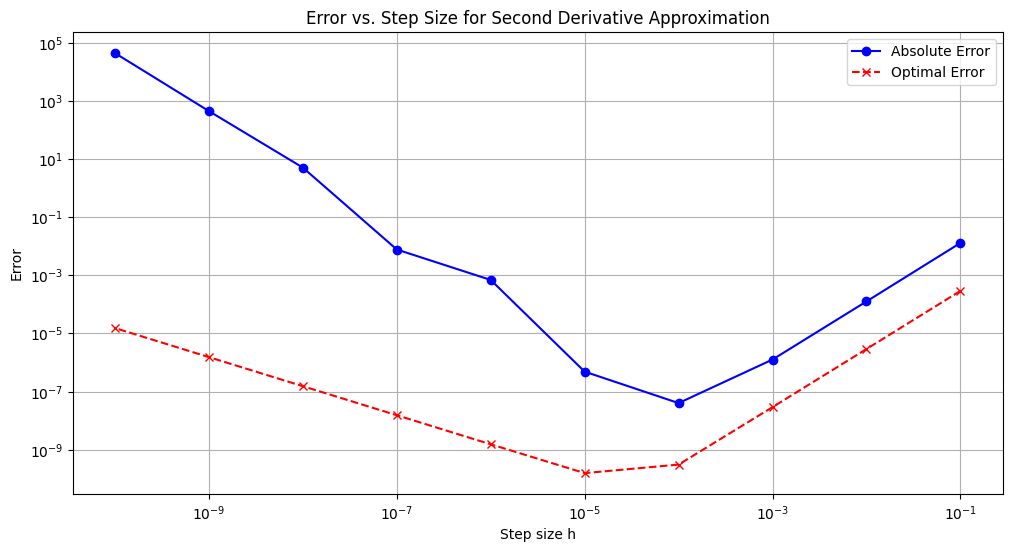

In [107]:
plt.figure(figsize=(12, 6))
plt.loglog(h_val, abs_errors, marker='o', linestyle='-', color='b', label='Absolute Error')
plt.loglog(h_val, optimal_errors, marker='x', linestyle='--', color='r', label='Optimal Error')
plt.xlabel('Step size h')
plt.ylabel('Error')
plt.xscale("log")
plt.yscale("log")
plt.title('Error vs. Step Size for Second Derivative Approximation')
plt.legend()
plt.grid(True)
plt.show()

**Displaying in a Table:**

In [108]:
error_table = pd.DataFrame({
    'h': h_val,
    'Absolute Error': abs_errors,
    'Optimal Error': optimal_errors
})
print(error_table)

              h  Absolute Error  Optimal Error
0  1.000000e-01    1.303479e-02   2.915834e-04
1  1.000000e-02    1.266421e-04   2.915834e-06
2  1.000000e-03    1.266268e-06   2.915987e-08
3  1.000000e-04    4.013764e-08   3.068939e-10
4  1.000000e-05    4.842268e-07   1.560211e-10
5  1.000000e-06    6.932634e-04   1.531082e-09
6  1.000000e-07    7.744432e-03   1.531053e-08
7  1.000000e-08    5.099281e+00   1.531053e-07
8  1.000000e-09    4.491885e+02   1.531053e-06
9  1.000000e-10    4.441402e+04   1.531053e-05


As visible above, for numeric precision of python and subtractive cancellation, the absolute error at $1.00e-09$ and $1.000e-10$ becomes tremendous and then reaches the normal range of values.

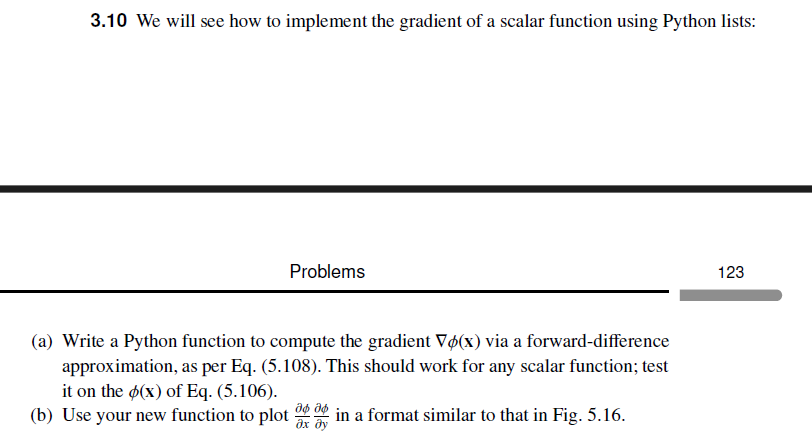

# **Forward-Difference Approximation of $\nabla\phi(x)$**

The forward-difference approximation for the gradient of a scalar function $\phi(x)$ can be computed as:

$$ \frac{\partial\phi}{\partial x_{i}}\approx\ \frac{\phi(x+h\cdot e_{i})-\phi(x)}{h} $$


where:
* $x$ is a vector of independent variables
* $h$ is a small step size
* $e_{i}$ is a unit vector in the direction of $x_{i}$

In our question, we have been asked to consider $\phi$ as the following:

$$\phi(x_{0},x_{1})=x_{0}^{2}-2x_{0}+x_{1}^{4}-2x_{1}^{2}+x_{1}$$


In [70]:
phi=lambda params: params[0]**2-2*params[0]+params[1]**4-2*params[1]**2+params[1]

In [71]:
def forward_difference_gradient(phi,x,h=1e-5):
  grad=[]
  for i in range (len(x)):
    x_forward=list(x)
    x_forward[i]+=h
    partial=(phi(x_forward)-phi(x))/h
    grad.append(partial)
  return grad
x_point=(1,2)
grad=forward_difference_gradient(phi,x_point)
print("Gradient at {}: {}".format(x_point,grad))

Gradient at (1, 2): [1.000000082740371e-05, 25.000220000848113]


In [72]:
x0_range=np.linspace(-2,2,100)
x1_range=np.linspace(-2,2,100)

X0,X1=np.meshgrid(x0_range,x1_range)

dfdx0=np.zeros((len(x0_range),len(x1_range)))
dfdx1=np.zeros((len(x0_range),len(x1_range)))

for i in range(X0.shape[0]):
    for j in range(X0.shape[1]):
        gradient = forward_difference_gradient(phi, [X0[i, j], X1[i, j]])
        dfdx0[i, j] = gradient[0]  # ∂φ/∂x0
        dfdx1[i, j] = gradient[1]



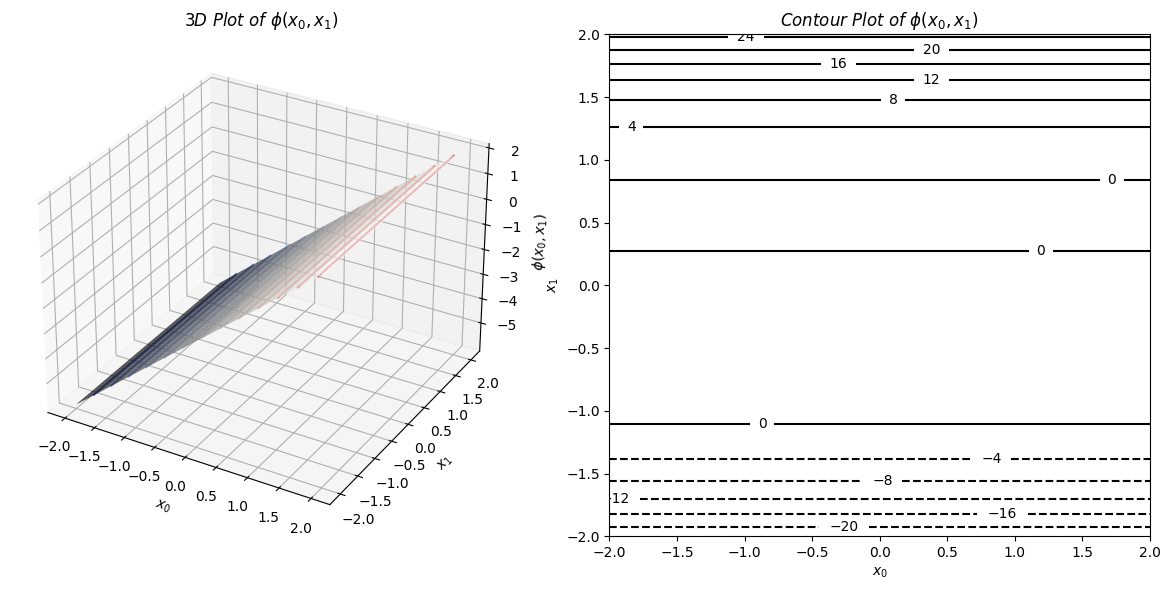

In [73]:
fig = plt.figure(figsize=(12, 6))

# 3D plot (left)
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X0, X1, dfdx0, cmap='gray', edgecolor='none', alpha=0.8)
ax1.contour(X0, X1, dfdx0, levels=15, cmap='coolwarm', linestyles='solid')
ax1.set_title(r'$3D\ Plot\ of\ \phi(x_0, x_1)$')
ax1.set_xlabel(r'$x_0$')
ax1.set_ylabel(r'$x_1$')
ax1.set_zlabel(r'$\phi(x_0, x_1)$')

# 2D contour plot (right)
ax2 = fig.add_subplot(122)
cs = ax2.contour(X0, X1, dfdx1, levels=15, colors='black')
ax2.clabel(cs, inline=True, fontsize=10)
ax2.set_title(r'$Contour\ Plot\ of\ \phi(x_0, x_1)$')
ax2.set_xlabel(r'$x_0$')
ax2.set_ylabel(r'$x_1$')

plt.tight_layout()
plt.show()

This marks the end of the 2nd question which just suggested us to plot contour maps for $\phi(x_{0},x_{1})$ similar to the following diagram:
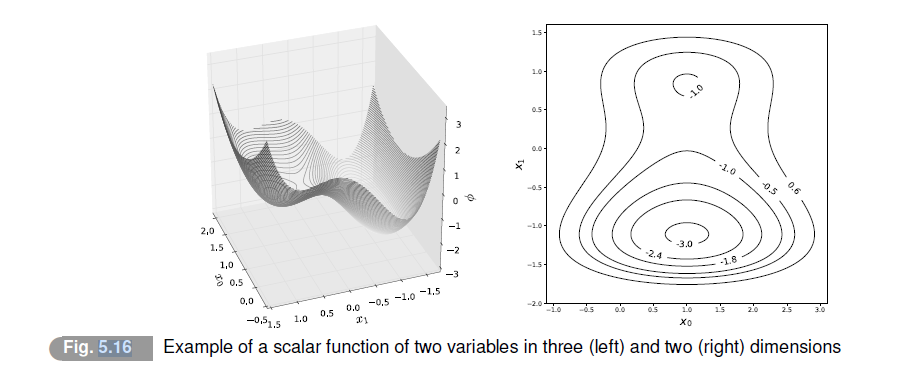

#**Problem 3.11: Third and Final Question**

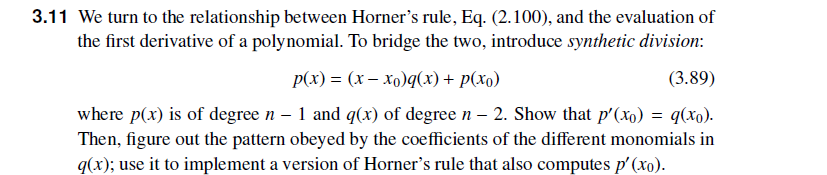

Given, the synthetic division rule:
$p(x)=(x-x_{0})q(x)+p(x_{0})$


Here:
* $deg(p(x))=n-1$
* $deg(q(x))=n-2$



From the equation, $$p(x)=(x-x_{0})q(x)+p(x_{0})$$

Differentiating both sides with respect to $x$, we get:

$$p'(x)=q(x)+(x-x_{0})q'(x)$$

Now, we evaluate the derivative at $x=x_{0}$, we get:

$$p'(x_{0})=q(x_{0})$$


**This shows that the derivative of the polynomial $p(x)$ at $x_{0}$ is equal to $q(x_{0})$**

**Implementing Horner's Rule to compare $p(x_{0})$ and $p'(x_{0})$**

The coefficients of the polynomial $q(x)$in the expression:
$$p(x)=(x-x_{0})q(x)+p(x_{0})$$

are related to the coefficients of $p(x)$




In [74]:
def horner_derivative(coeffs,x_0):
  n=len(coeffs)
  p_x0=coeffs[0]
  p_prime_x0=0

  for i in range (1,n):
    p_prime_x0 = p_prime_x0 * x_0 + p_x0
    p_x0 = p_x0 * x_0 + coeffs[i]

  return p_x0,p_prime_x0

In [75]:
#Sanity Check Reconstruction
f=lambda coeff,x:coeff[0]*x**(len(coeff)-1)+coeff[1]*x**(len(coeff)-2)+coeff[2]*x**(len(coeff)-3)+coeff[3]*x**(len(coeff)-4)

def forward_grad(coeffs,f,x,h=1e-5):
  term=(f(coeffs,x+h)-f(coeffs,x))/h
  return term

In [76]:
coefficients = [1, -3, 2, 4]  # Example polynomial coefficients for p(x) = x^3 - 3x^2 + 2x + 4
x0 = 5  # Point at which to evaluate
p_x0, p_prime_x0 = horner_derivative(coefficients, x0)

print(f"Using Horner's Method : p({x0}) = {p_x0}")
print(f"Using Horner's Method : p'({x0}) = {p_prime_x0}")

Using Horner's Method : p(5) = 64
Using Horner's Method : p'(5) = 47


In [78]:
print(f"Derivative using vanilla forward gradient method is:: {forward_grad(coefficients,f,x0):.0f}")

Derivative using vanilla forward gradient method is:: 47
